In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Punto 3

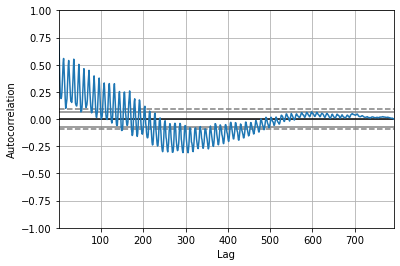

In [9]:
# Read file and correlation plot
file = pd.read_excel("ipc.xls")
series = file["Variación Mensual"].to_numpy()
ax1 = pd.plotting.autocorrelation_plot(series)
plt.savefig('ipc.pdf', bbox_inches='tight')

# Punto 1

In [10]:
def grad_ρ1(θ):
    θ1 = θ[0,0]
    θ2 = θ[1,0]
    term = (1 + θ1**2 + θ2**2)
    p1 = ((-1 + θ2)*term - 2*θ1*(-θ1 + θ1*θ2))/(term**2)
    p2 = (θ1*term - 2*θ2*(-θ1 + θ1*θ2))/(term**2)
    return np.vstack((p1, p2))

def grad_ρ2(θ):
    θ1 = θ[0,0]
    θ2 = θ[1,0]
    term = (1 + θ1**2 + θ2**2)
    p1 = (2*θ1*θ2)/(term**2)
    p2 = (2*θ2**2 - term)/(term**2)
    return np.vstack((p1, p2))

def ρ1(θ1):
    θ1 = θ[0,0]
    θ2 = θ[1,0]
    return np.abs((-θ1 + θ1*θ2)/(1 + θ1**2 + θ2**2))

def ρ2(θ1):
    θ1 = θ[0,0]
    θ2 = θ[1,0]
    return np.abs((-θ2)/(1 + θ1**2 + θ2**2))

In [11]:
def optimize(f, grad, ρ0, h, tol):
    θs = [np.vstack(ρ0)]
    i = 1
    while True:
        prev_θ = θs[i-1]
        new_θ = prev_θ - h*grad(prev_θ)
        θs.append(new_θ)
        if np.abs(f(new_θ) - f(prev_θ)) < tol:
            break
        i += 1
    return θs[-1]

In [12]:
h = 0.001
tol = 10e-10
ρ0 = (0, 0)
thetas_rho1 = optimize(ρ1, grad_ρ1, ρ0, h, tol)
thetas_rho2 = optimize(ρ2, grad_ρ2, ρ0, h, tol)

In [13]:
ρ1(thetas_rho1)

0.707102032275067

In [14]:
ρ2(thetas_rho2)

0.49999900529742086